
## Assignment - Bike Sharing Agreement Mulitple Linear Regression
### Problem Statement
#### Author -Sravana Sanka
BoomBikes, a US-based bike-sharing provider, has recently experienced a significant decline in revenue due to the ongoing COVID-19 pandemic. Struggling to sustain itself in the current market conditions, the company has decided to devise a strategic business plan aimed at boosting revenue once the lockdown ends and the economy recovers.

To achieve this, BoomBikes has engaged a consulting firm to analyze the factors influencing the demand for shared bikes. Their objective is to gain insights into the key variables driving demand in the American market and to determine:

The variables that play a significant role in predicting shared bike demand.
The extent to which these variables explain the fluctuations in demand.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    1) Which variables are significant in predicting the demand for shared bikes
    2) How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Objective:

It is required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### Model Implementation Process
1. Comprehending, analyzing, and visualizing the dataset  
2. Conducting Exploratory Data Analysis (EDA)  
3. Preparing data for Linear Regression (including train-test split and rescaling)  
4. Constructing the model  
5. Training the regression model  
6. Performing residual analysis  
7. Evaluating the model's performance  
8. Generating predictions

### Step 1: Comprehending, analyzing, and visualizing the dataset


In [1072]:

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler

#### __Loading Data & Exploration__

In [1074]:
bike = pd.DataFrame(pd.read_csv("day.csv"))

#### __Check the head of the dataset__

In [1076]:
bike.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


#### __Data Exploration__


In [1078]:
bike.shape

(730, 16)

#### __Checking the descriptive information__

In [1080]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1081]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### __Data Quality Check__

#### __Checking for null values__

#### __Verifying Missing Values Column Wise__

In [1085]:
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### __Verifying Missing Values Row Wise__

In [1087]:
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

#### __Duplicate Check__

In [1089]:
bike_dup = bike.copy()

##### __Checking for duplicates and dropping the entire duplicate row if any__ #####


In [1091]:
bike_dup.drop_duplicates(subset=None, inplace=True)

In [1092]:
bike_dup.shape

(730, 16)

#### __Summery of All key Findings__

Summery of key findings

- Size of data set is 730 x 16, 730 Rows and 16 Columns 
- Except one column i.e. dteday, others are either float or integer type, this date type
- Few fields are categorical in nature, but in Dataset these are present in form of integer/float 
- column 'yr' with two values 0 and 1 indicating the years 2018 and 2019
- Colums 'weathersit' and 'season' have values as 1, 2, 3, 4 which are in fact are Categorical 
- There are nissing / Null values neither in columns nor in rows
_ There are no Duplicate Values in provided Dataset

#### __Data Cleaning__
##### __Checking value_counts() for entire dataframe__
##### __This step shall identify any Unknow/Junk values present in the dataframe__

In [1096]:
#Create a copy of the  dataframe, without the 'instant' column which doesnt have any relevance.
bike_dummy=bike.iloc[:,1:16]
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 



season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 



yr
0    365
1    365
Name: count, dtype: int64 



mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64 



holiday
0    709
1     21
Name: count, dtype: int64 



weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 



workingday
1    499
0    231
Name: count, dtype: int64 



weathersit
1    463
2    246
3     21
Name: count, dtype: int64 



temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: count, Length: 498, dtype: int64 



atemp
32.7

##### __Dataset characteristics__	
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

#### __Removing redundant & unwanted columns__
##### _Based on the analysis of data set, following columns can be removed from data frame:__
- instant : Its only an index value
- dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.
- casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.
- We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

In [1099]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1100]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [1101]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [1102]:
# Encoding/mapping the season column

bike_new.season = bike_new.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
# Encoding/mapping the month column

bike_new.mnth = bike_new.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
# Encoding/mapping the weekday column

bike_new.weekday = bike_new.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
# Encoding/mapping the weathersit column

bike_new.weathersit = bike_new.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})
# check the head of the dataset

bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [1103]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


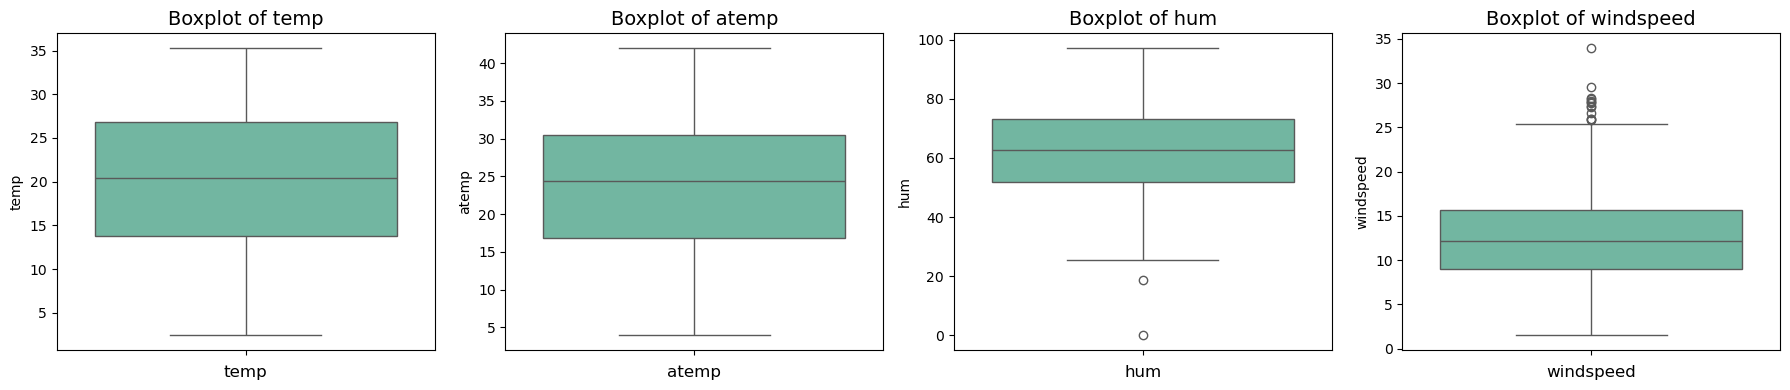

In [1104]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
# Set figure size
plt.figure(figsize=(18, 4))

# Create subplots for each column
i = 1
for col in cols:
    plt.subplot(1, 4, i)
    
    # Add boxplot with custom color palette
    sns.boxplot(y=col, data=bike_new, palette='Set2')
    
    # Set title and axis labels for better clarity
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    
    # Increase subplot index
    i += 1

# Adjust layout
plt.tight_layout()
plt.show()

#### These plots show that there are no outliers present, meaning there is no need for any handling. The dataset is free of outliers, which is ideal.


## __Step 2: Visualising the Data__

### Exploratory Data Analysis

##### __Data Visualisation of various varibale against target variable__
##### __Target Variable is cnt__


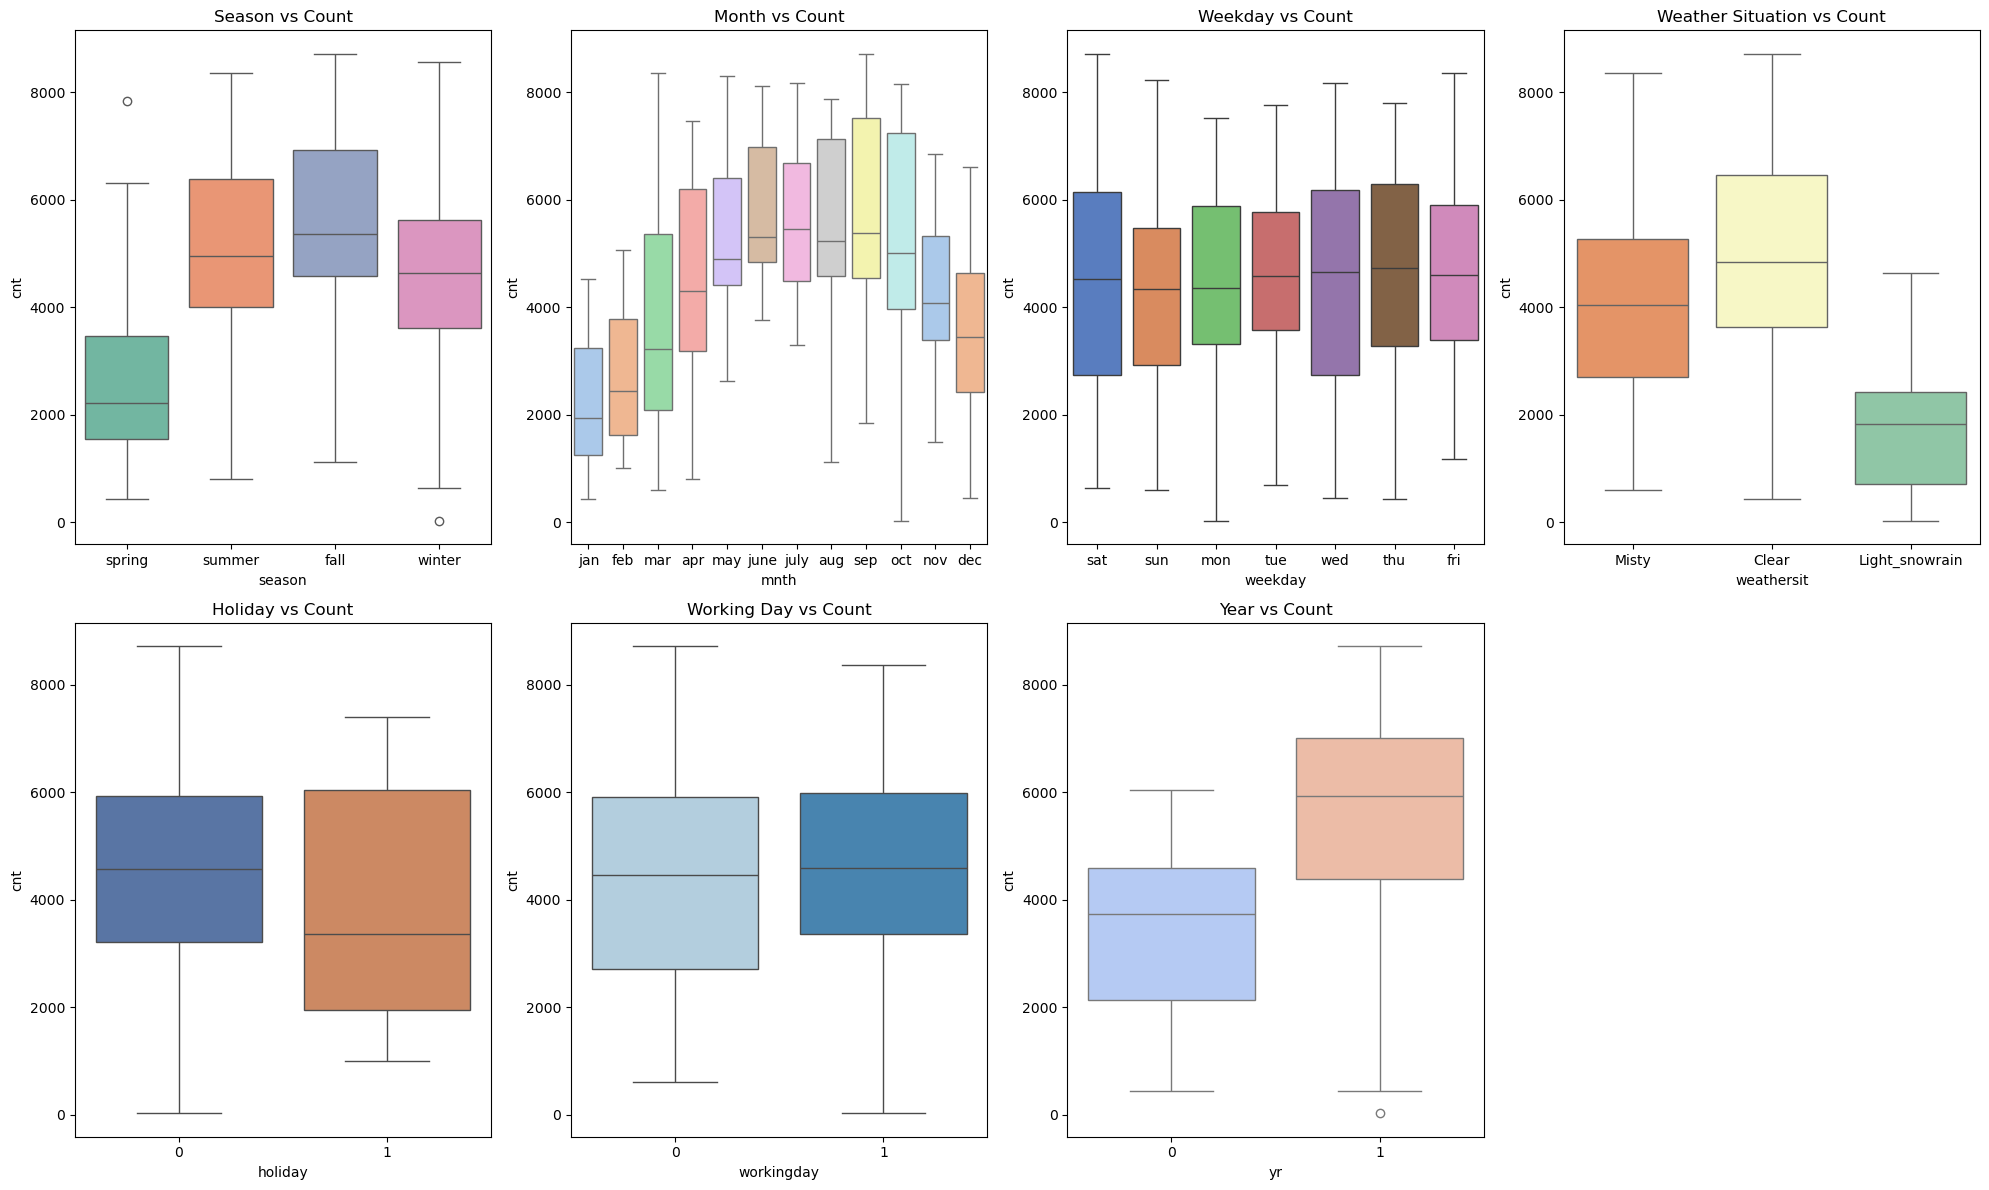

In [1109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(20, 12))

# Plot 1: Boxplot for 'season' vs 'cnt'
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=bike_new, palette='Set2')  # Set2 for better color contrast
plt.title("Season vs Count")

# Plot 2: Boxplot for 'yr' vs 'cnt'
plt.subplot(2, 4, 7)
sns.boxplot(x='yr', y='cnt', data=bike_new, palette='coolwarm')  # coolwarm for year comparison
plt.title("Year vs Count")

# Plot 3: Boxplot for 'mnth' vs 'cnt'
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=bike_new, palette='pastel')  # pastel for monthly data
plt.title("Month vs Count")

# Plot 4: Boxplot for 'holiday' vs 'cnt'
plt.subplot(2, 4, 5)
sns.boxplot(x='holiday', y='cnt', data=bike_new, palette='deep')  # deep for holiday comparison
plt.title("Holiday vs Count")

# Plot 5: Boxplot for 'weekday' vs 'cnt'
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=bike_new, palette='muted')  # muted for weekday data
plt.title("Weekday vs Count")

# Plot 6: Boxplot for 'workingday' vs 'cnt'
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=bike_new, palette='Blues')  # Blues for working day
plt.title("Working Day vs Count")

# Plot 7: Boxplot for 'weathersit' vs 'cnt'
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=bike_new, palette='Spectral')  # Spectral for weather conditions
plt.title("Weather Situation vs Count")

# Show all plots
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [1110]:
def plot_cat_columns(column):
    """
    Function to plot bar charts for the given categorical column.
    
    Args:
    column (str): The name of the categorical column to plot against 'cnt'.
    """
    # Set figure size
    plt.figure(figsize=(12, 6))
    
    # Plot 1: Barplot for column vs 'cnt'
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=bike_new, palette='muted')  # Muted colors for clarity
    plt.title(f"{column} vs Count (Overall)", fontsize=14)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel("Count", fontsize=12)
    
    # Plot 2: Barplot for column vs 'cnt' with 'yr' hue
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=bike_new, hue='yr', palette='Set1')  # Set1 palette for distinct years
    plt.title(f"{column} vs Count by Year", fontsize=14)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel("Count", fontsize=12)
    
    # Customize legend
    legend_colors = ['red', 'blue']  # Define colors for legend
    legend_labels = ['2018', '2019']  # Define labels for legend
    handles = [plt.Line2D([0], [0], color=color, lw=2) for color in legend_colors]
    
    # Add legend to the second plot
    plt.legend(handles=handles, labels=legend_labels, title="Year", loc='upper right', fontsize=10)
    
    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


In [1111]:
def plot_cat_columns1(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=bike_new)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=bike_new, hue='yr',palette='Set1')
    legend_colors = ['red', 'blue']
    legend_labels = ['2018', '2019']
    # Create custom handles for the legend
    handles = [plt.Line2D([0], [0], color=color, lw=2) for color in legend_colors]
    # Add the legend to the plot
    plt.legend(handles=handles, labels=legend_labels)
    plt.show()

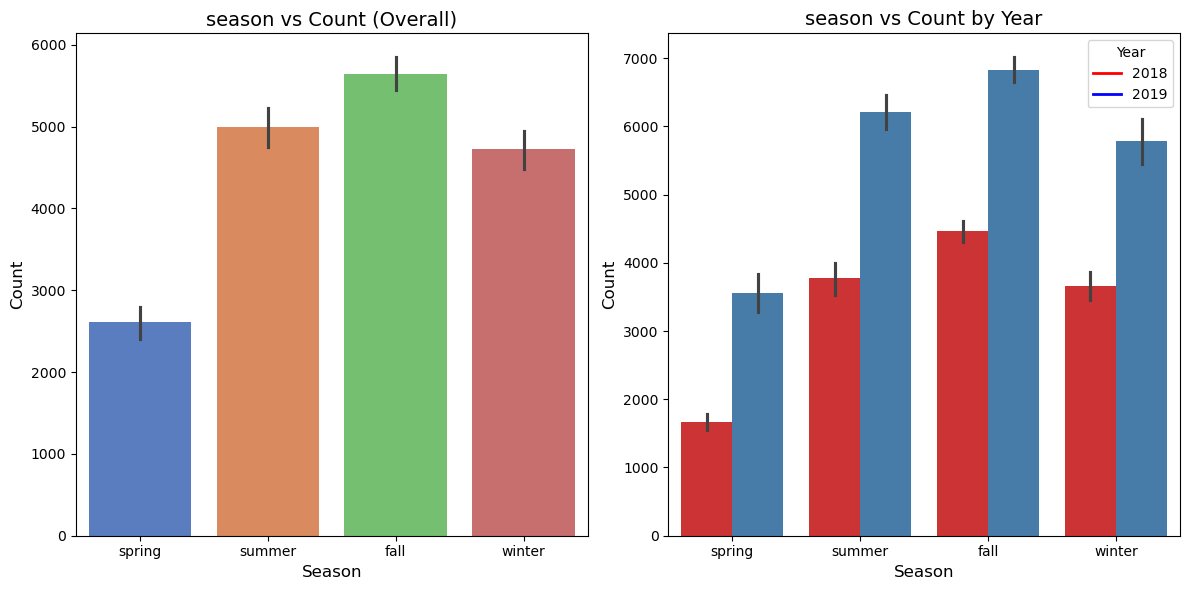

In [1112]:
plot_cat_columns('season')

###### __Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.__

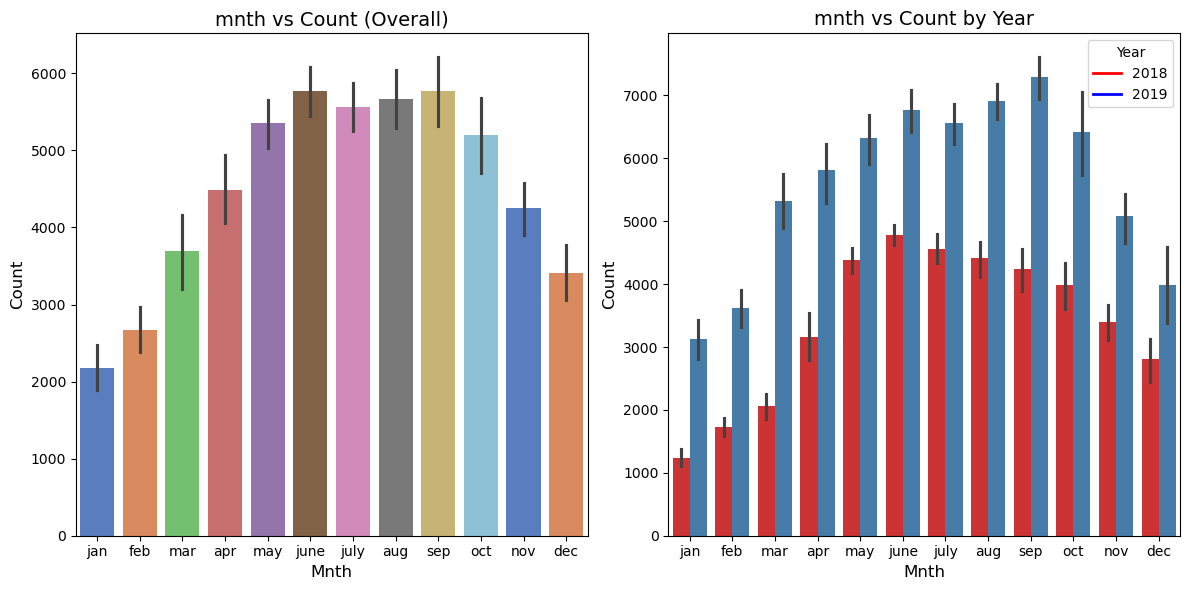

In [1114]:
# plotting visualization for month column

plot_cat_columns('mnth')

###### __Majoity of the bookings carried out during the month of may, june, july, aug, sep and oct.Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019.__

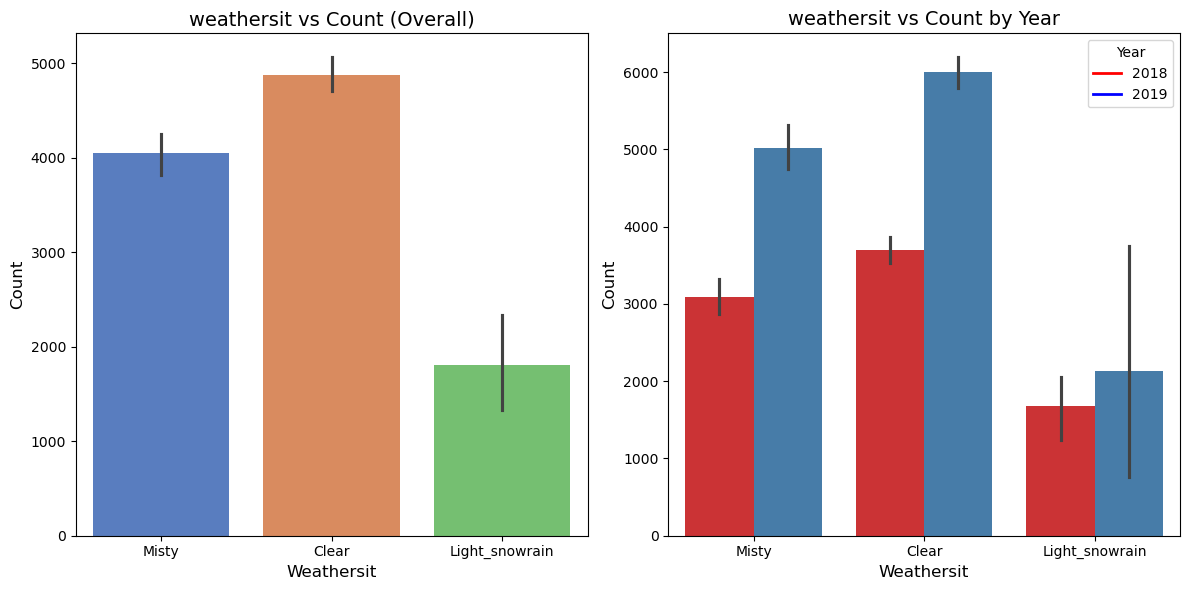

In [1116]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

###### __Clear weather attracted more booking which seems obvious. And in comparison to 2018, booking increased for each weather situation in 2019.__

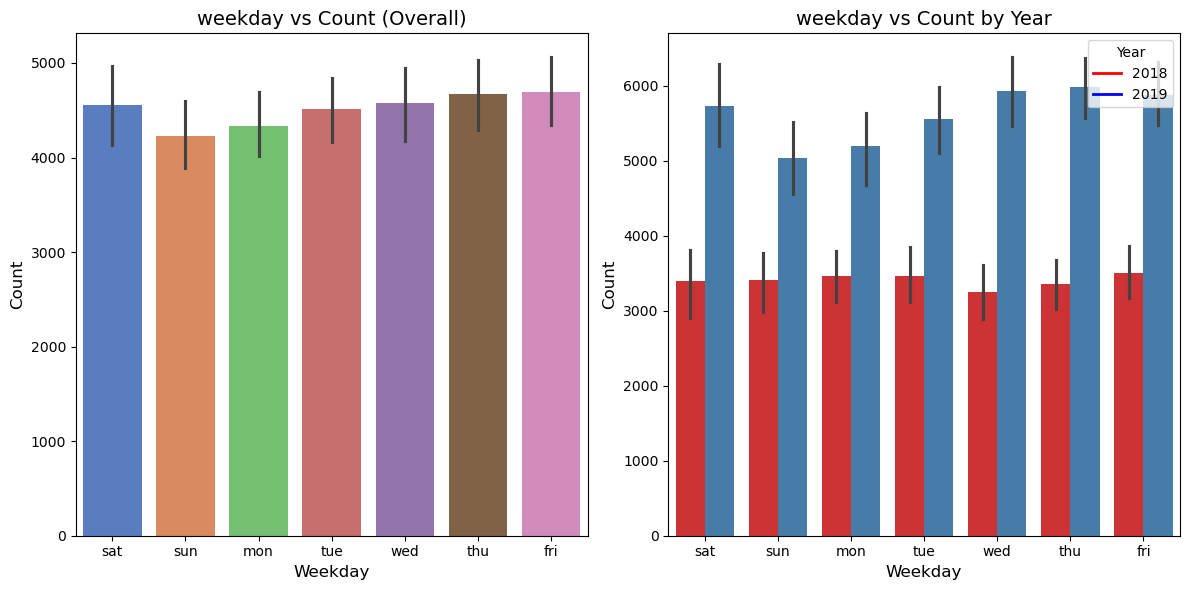

In [1118]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

###### __Thu, Fir, Sat have more number of bookings as compared to the start of the week.__

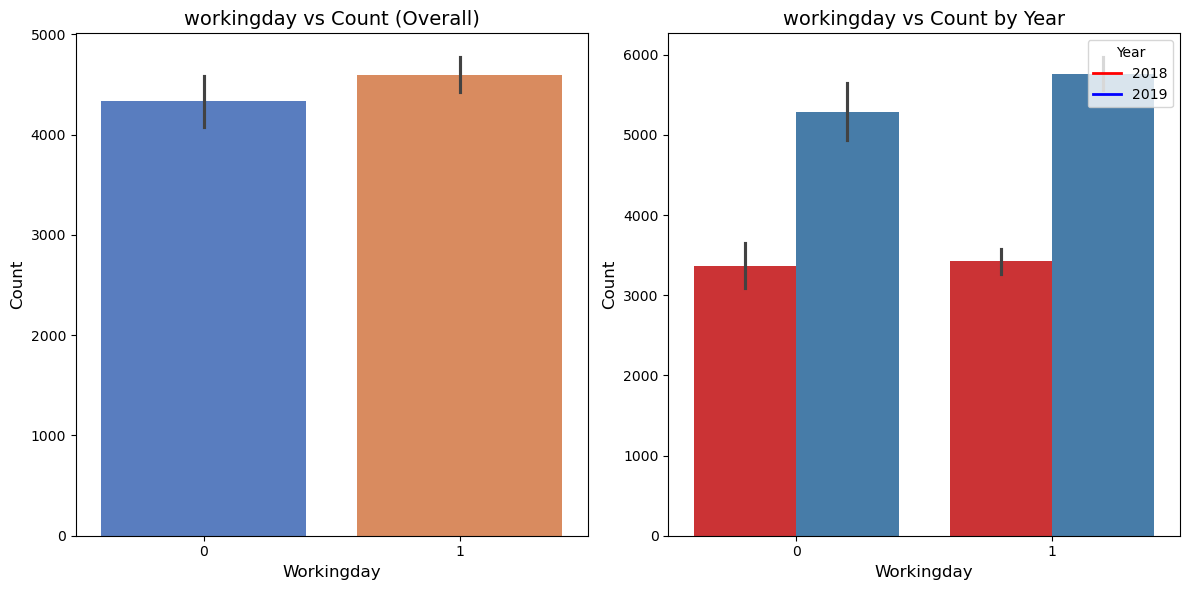

In [1120]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

###### __Booking seemed to be almost equal either on working day or non-working day. But, the quantity of booking increased from 2018 to 2019.__

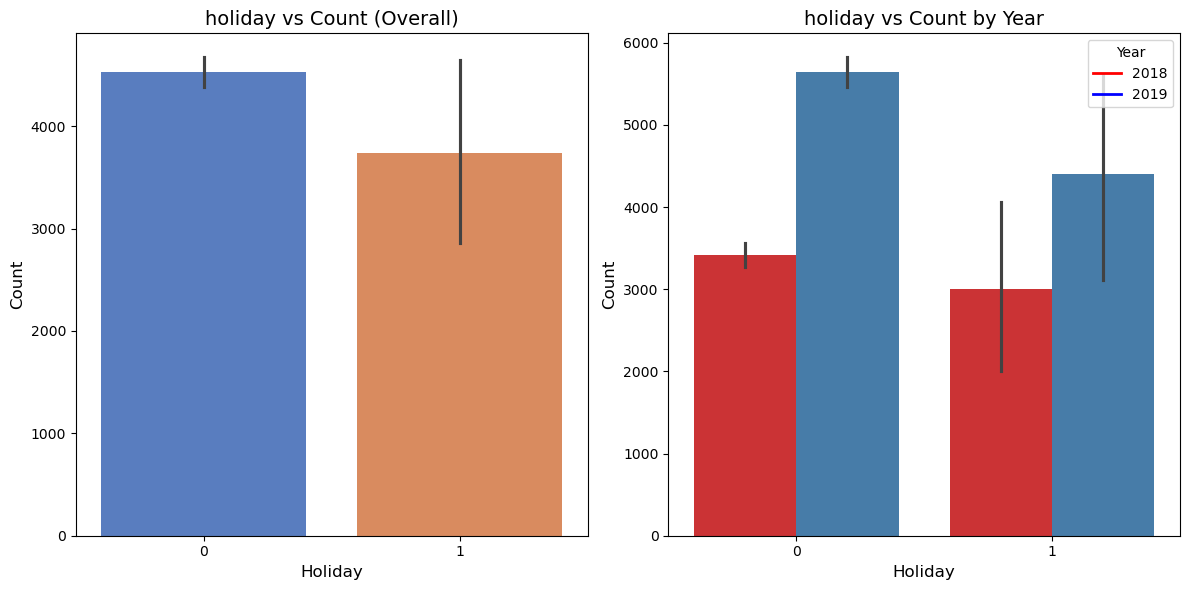

In [1122]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

###### __When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.__

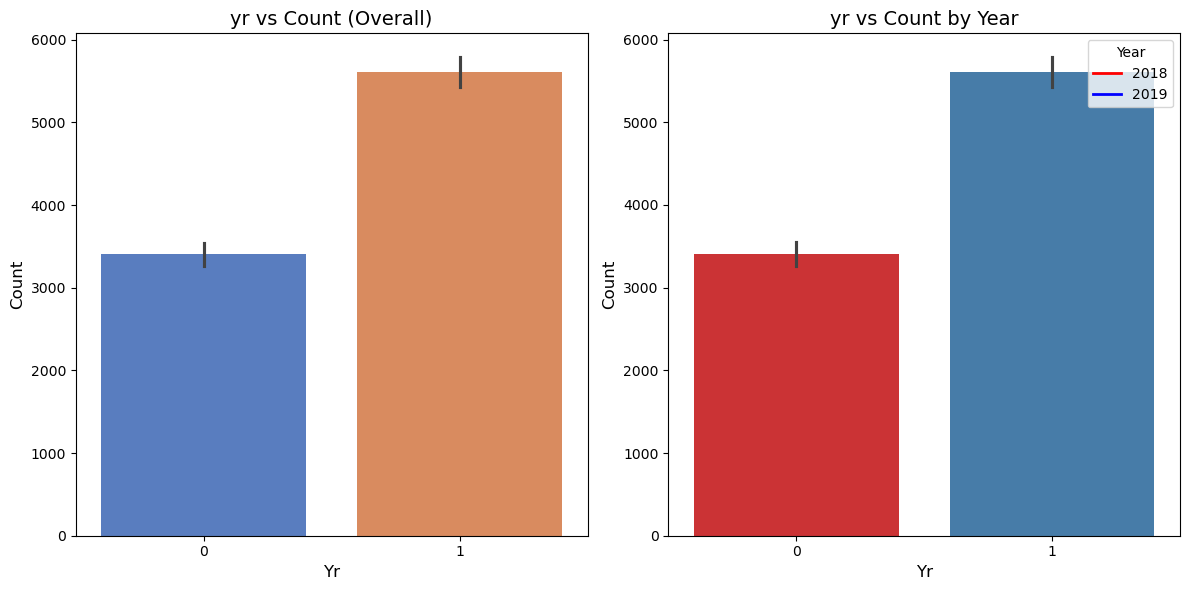

In [1124]:
# plotting visualization for year column

plot_cat_columns('yr')

###### __2019 attracted more number of booking compared to 2018, which shows good progress in terms of business.__

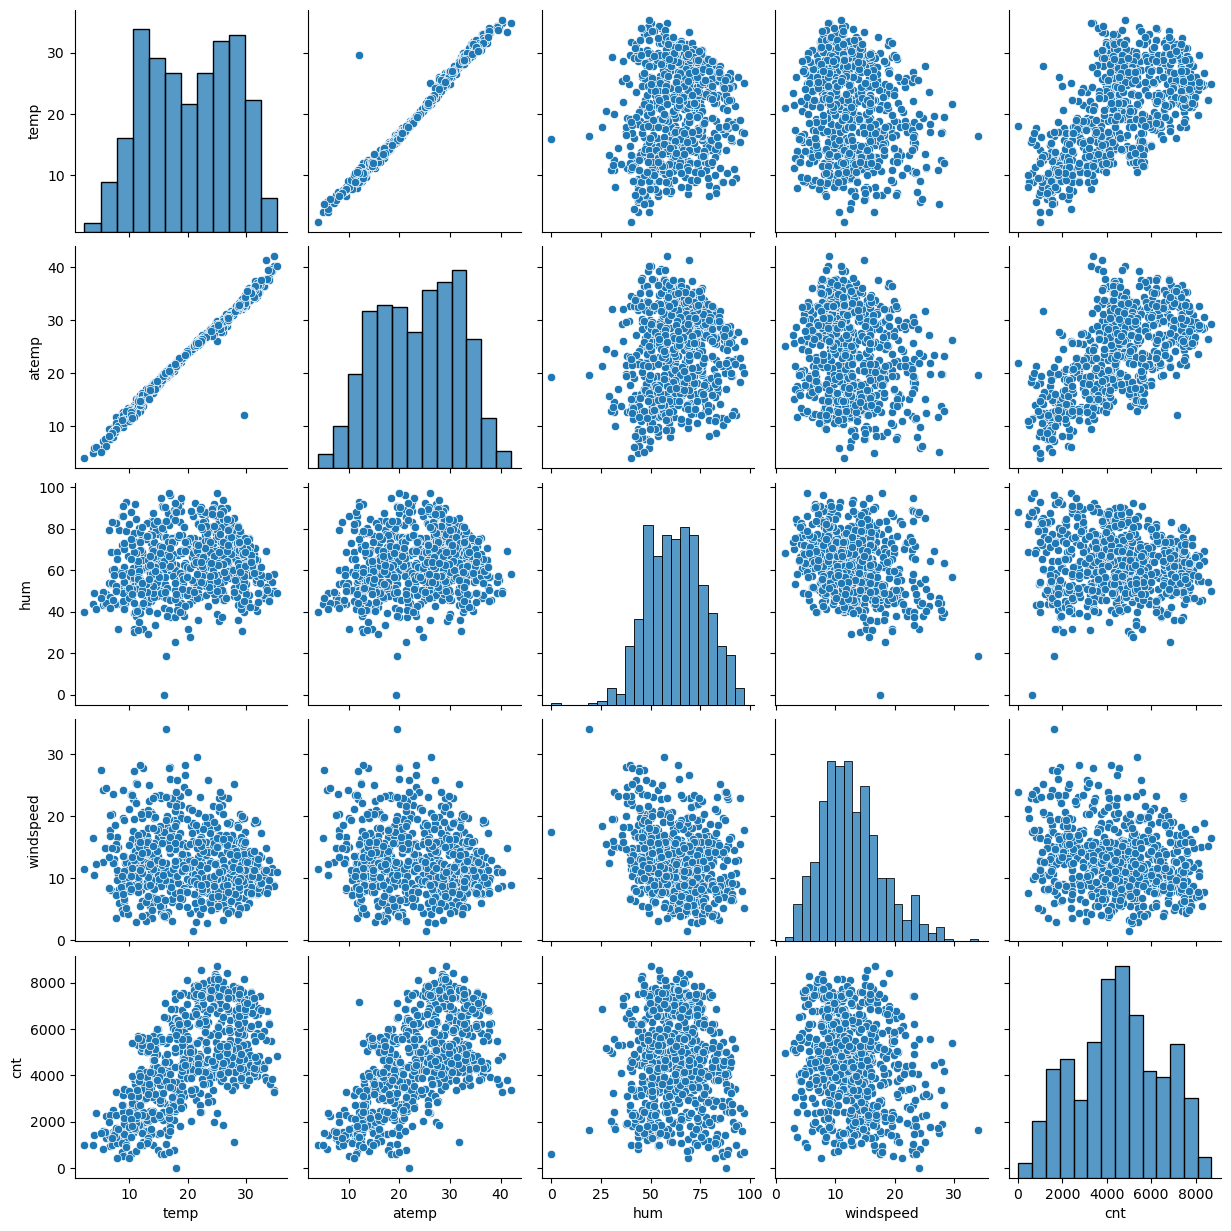

In [1126]:
# Analyzing/Visualizing the numerical columns
sns.pairplot(
    data=bike_new,              # Data to be visualized
    vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt']  # Numerical columns for pairplot
)

# Show the plot
plt.show()

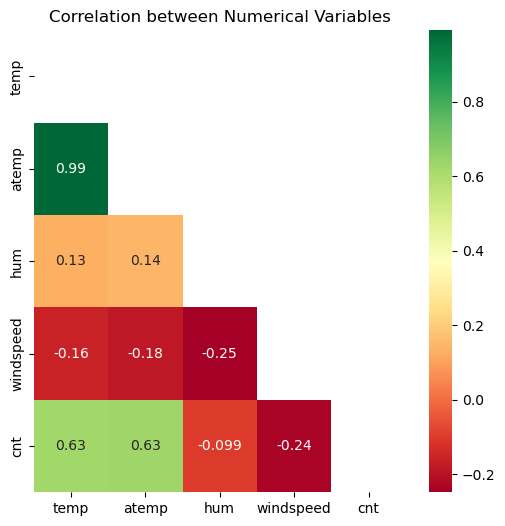

In [1127]:
# Checking the correlation between the numerical variables

# Set figure size for the heatmap
plt.figure(figsize=(6, 6))

# Compute the correlation matrix for the selected numerical columns
correlation_matrix = bike_new[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(correlation_matrix)

# Plot the heatmap with annotations and color map
sns.heatmap(
    correlation_matrix,       # The correlation matrix to visualize
    annot=True,               # Annotate each cell with the correlation value
    cmap="RdYlGn",            # Color map for better visualization
    mask=mask                 # Mask the upper triangle of the matrix
)

# Set the title of the heatmap
plt.title("Correlation between Numerical Variables")

# Show the plot
plt.show()

###### __It is clear from the above plot that there is a strong linear relationship between the variables 'temp' and 'atemp'. Due to this multicollinearity, both parameters cannot be included in the model simultaneously. To further assess this, we need to examine the Variance Inflation Factor (VIF) and the p-values in relation to the other variables__

In [1129]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## __Step 3: Data Preparation__

##### __In the dataset, we observe that some variables, such as 'weathersit' and 'season', have numeric values like 1, 2, 3, and 4, each corresponding to specific labels (as detailed in the data dictionary). While these numeric values might suggest an inherent order, this is not the case. Therefore, it is important to convert these features into categorical string values before proceeding with model building.__

In [1132]:
# Convert to 'category' data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')


In [1133]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


### __Creating Dummy Variable__



##### __In both Simple Linear Regression (SLR) and Multiple Linear Regression (MLR), dummy variables are created to transform categorical data into a numerical format, enabling the regression model to process and analyze it effectively.__

- **Numerical Processing**: 
  - Regression algorithms require numerical data. Since categorical variables (e.g., "Male" or "Female") cannot be directly processed, they must be converted into numerical equivalents.

- **Representation of Categories**: 
  - Dummy variables allow us to represent different categories without implying any numerical order, ensuring the model doesn't mistakenly assume an ordinal relationship.

- **Interpretation**: 
  - By using dummy variables, the model can assess the individual impact of each category on the dependent variable, providing clearer insights into the relationships.

##### __Objective of the Code__

- **Create Dummy Variables**: 
  - Generate dummy variables for categorical columns such as `season`, `mnth`, `weekday`, and `weathersit`.
  
- **Drop Original Variables**: 
  - Remove the original categorical variables after creating their corresponding dummy variables to avoid redundancy.

- **Drop First Dummy Variable**: 
  - Drop the first dummy variable for each set to avoid multicollinearity and ensure the model can process the data efficiently.


In [1137]:
bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   hum                        730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   season_spring              730 non-null    bool   
 9   season_summer              730 non-null    bool   
 10  season_winter              730 non-null    bool   
 11  mnth_aug                   730 non-null    bool   
 12  mnth_dec                   730 non-null    bool   
 13  mnth_feb                   730 non-null    bool   

In [1138]:
bike_new.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,True,False,False
5,0,0,1,8.378268,11.66045,51.8261,6.000868,1606,True,False,...,False,False,False,False,False,True,False,False,False,False
6,0,0,1,8.057402,10.44195,49.8696,11.304642,1510,True,False,...,False,False,False,False,False,False,False,False,False,True
7,0,0,0,6.765000,8.11270,53.5833,17.875868,959,True,False,...,False,False,False,True,False,False,False,False,False,True
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,True,False,...,False,False,False,False,True,False,False,False,False,False
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,True,False,...,False,False,True,False,False,False,False,False,False,False


In [1139]:
bike_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   hum                        730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   season_spring              730 non-null    bool   
 9   season_summer              730 non-null    bool   
 10  season_winter              730 non-null    bool   
 11  mnth_aug                   730 non-null    bool   
 12  mnth_dec                   730 non-null    bool   
 13  mnth_feb                   730 non-null    bool   

In [1140]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,True,False,False


In [1141]:
for col in ['season_spring', 'season_summer','season_winter','mnth_aug','mnth_dec','mnth_feb','mnth_jan','mnth_july','mnth_june','mnth_mar','mnth_may','mnth_nov','mnth_oct','mnth_sep','weekday_mon','weekday_sat','weekday_sun','weekday_tue','weekday_thu','weekday_wed','weathersit_Light_snowrain','weathersit_Misty'] :    bike_new[col] = bike_new[col].astype('uint8')

In [1142]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   hum                        730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   season_spring              730 non-null    uint8  
 9   season_summer              730 non-null    uint8  
 10  season_winter              730 non-null    uint8  
 11  mnth_aug                   730 non-null    uint8  
 12  mnth_dec                   730 non-null    uint8  
 13  mnth_feb                   730 non-null    uint8  

In [1143]:
# check the shape of new dataframe

bike_new.shape

(730, 30)

In [1144]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


## __Step 4: Splitting Data into Training and Testing Sets__

#### __Train Test Split__

##### __Spilliting the Train data and Test data in 70:30 ratio__


In [1148]:
np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 100)

In [1149]:
# Shape of Training datatset
df_train.shape

(510, 30)

In [1150]:
# Shape of Testing datatset
df_test.shape

(219, 30)

#### __Scaling the variables__
##### __Why we need scaling__
- Ease of interpretation
- Faster convergence for gradient descent methods
##### __How to achieve Scaling__
- Standardisation
- MinMax Scaling
###### __Standardisation brings all of the data into a standard normal distribution with mean zero and standard deviation one. MinMax scaling, on the other hand, brings all of the data in the range of 0 and 1.__


In [1152]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


In [1153]:
# Apply scaler() to all the numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1154]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [1155]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


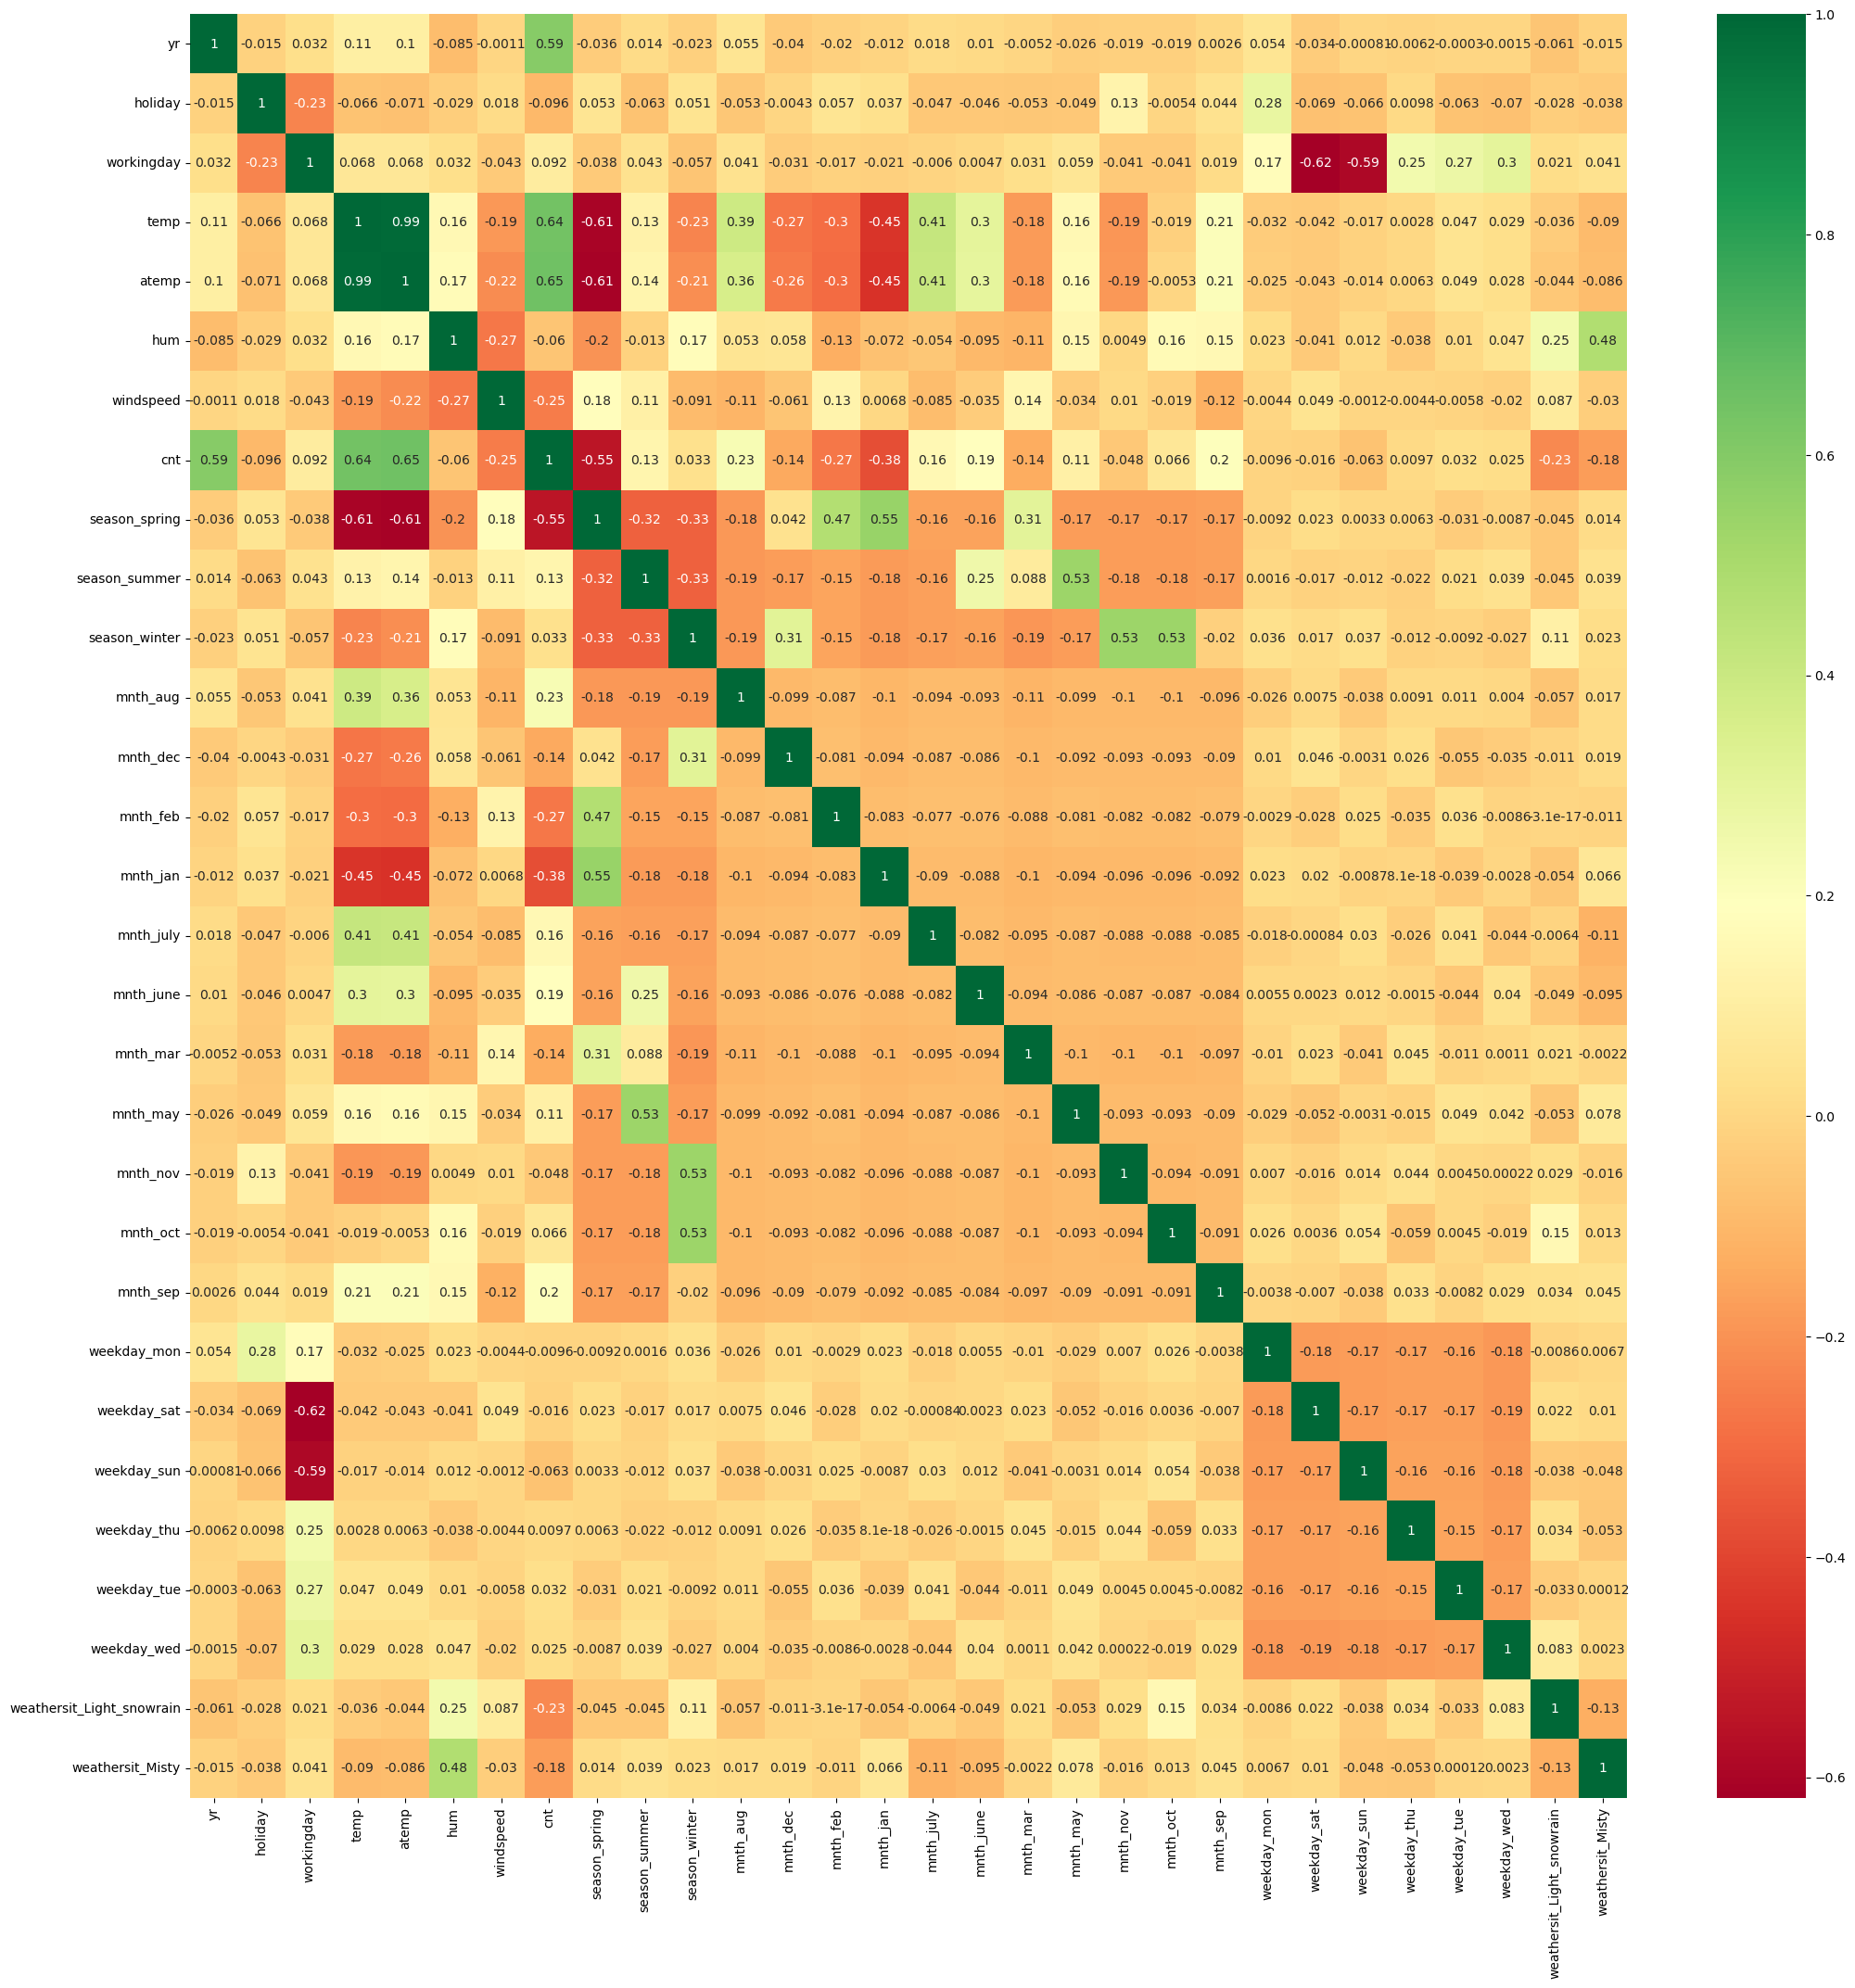

In [1156]:
# Let's check the correlation coefficients to see which variables are highly correlated. 
# Note: here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

#### __Findings__

- **Correlation with `cnt`**: 
  - The variable `cnt` shows a strong correlation with `year`, `temp`, and `atemp`.

- **Humidity and Misty Weather**: 
  - There is a notable correlation between misty weather and humidity.

- **Seasonal Correlations**: 
  - **Spring Season**: Correlated with the months of January and February.
  - **Summer Season**: Correlated with the month of May.
  - **Winter Season**: Correlated with the months of October and November.


###### __Insights from the Heatmap__

- The heatmap clearly highlights variables that exhibit multicollinearity, as well as those with high collinearity with the target variable, `cnt`.

- This map will serve as a reference throughout the linear model-building process, helping to:
  - Validate different correlated values.
  - Analyze Variance Inflation Factor (VIF) and p-values.
  - Identify the appropriate variables to retain or eliminate from the model.


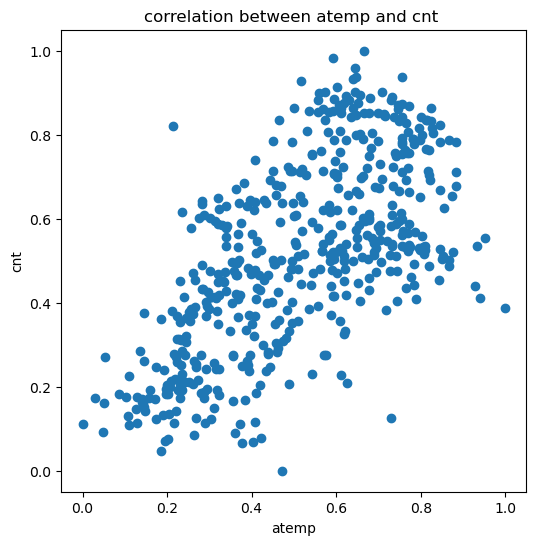

In [1159]:
# Visualizing one of the correlation to see the trends via Scatter plot.
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.xlabel("atemp")  # Set the label for the x-axis
plt.ylabel("cnt")  # Set the label for the y-axis
plt.title("correlation between atemp and cnt ")
plt.show()

###### __Visualization confirms the positive correlation between atemp and cnt.__

In [1161]:
# Building the Linear Model
# target vraible cnt hence we need to popup it out
y_train = df_train.pop('cnt')
X_train = df_train

##### __RFE : Recursive feature elimination: Using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklean)__

In [1163]:
# Recursive Feature Elimination (RFE) Process

# Step 1: Initialize the Linear Regression model
lm = LinearRegression()

# Step 2: Fit the Linear Regression model on the training data
lm.fit(X_train, y_train)

# Step 3: Initialize RFE with the Linear Regression model as the estimator
# Select 15 features based on their importance
rfe = RFE(estimator=lm, n_features_to_select=15)

# Step 4: Fit the RFE model on the training data
rfe = rfe.fit(X_train, y_train)

In [1164]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_july', True, 1),
 ('mnth_june', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 4),
 ('mnth_oct', False, 11),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

In [1165]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_july',
       'mnth_sep', 'weekday_sat', 'weekday_sun', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')


In [1166]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

## __Step 5: Building Linear Model using statsmodels__

### __Iteration - 1__

##### __As we know lots of predictor variable are related and this situation is called Multicollinearity. Thus, its a big issue when trying to interpret the model. It is essential to detect and deal with the multicollinearity present in the model. How to deal with multicollinearity__
##### __Two basic ways of dealing with multicollinearity__
- Looking at pairwise correlations, Looking at the correlation between different pairs of independent variables
- Checking the Variance Inflation Factor (VIF)


#### __Checking Variance Inflation Factor (VIF)__


In [1171]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [1172]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [1173]:
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,50.69
11,weekday_sat,12.20
12,weekday_sun,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.61
4,hum,1.91
14,weathersit_Misty,1.57


###### __workingday shows high VIF value__


In [1175]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [1176]:
# Check the parameters obtained
lr1.params

const                        0.198900
yr                           0.229738
holiday                     -0.018955
workingday                   0.083695
temp                         0.527819
hum                         -0.159467
windspeed                   -0.180601
season_spring               -0.055434
season_summer                0.052613
season_winter                0.100294
mnth_july                   -0.054881
mnth_sep                     0.081773
weekday_sat                  0.093682
weekday_sun                  0.040479
weathersit_Light_snowrain   -0.246332
weathersit_Misty            -0.057847
dtype: float64

In [1177]:
# Print a summary of the linear regression model obtained after Iteration - 1
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          1.13e-191
Time:                        19:59:50   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##### __Iteration 1 Summary__

- **Key Insight**: The variable **`holiday`  - **0.373**** has the highest p-value.
- **Next Step**: Remove **`holiday`** in the next iteration to improve the model.


## __Iteration - 2__

- **Action**: Drop the variable **`holiday`**.
- **Reason**: It has a high p-value of **`0.373`**.

In [1180]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

#### __Checking Variance Inflation Factor (VIF) for Iteration-2__

In [1182]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,hum,32.14
2,temp,18.98
1,workingday,18.41
10,weekday_sat,4.91
4,windspeed,4.90
5,season_spring,4.80
11,weekday_sun,4.76
7,season_winter,3.71
6,season_summer,3.03
13,weathersit_Misty,2.31


In [1183]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [1184]:
lr2.params

const                        0.179945
yr                           0.229738
workingday                   0.102650
temp                         0.527819
hum                         -0.159467
windspeed                   -0.180601
season_spring               -0.055434
season_summer                0.052613
season_winter                0.100294
mnth_july                   -0.054881
mnth_sep                     0.081773
weekday_sat                  0.112637
weekday_sun                  0.059434
weathersit_Light_snowrain   -0.246332
weathersit_Misty            -0.057847
dtype: float64

In [1185]:
# Print a summary of the linear regression model obtained after Iteration - 2
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          1.13e-191
Time:                        19:59:50   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##### __Iteration 2  Summary__

- **Key Insight**: The variable **`hum`**  -->  **32.14** has the highest VIF.
- **Next Step**: Remove **`hum`** in the next iteration to improve the model.


## __Iteration - 3__

- **Action**: Drop the variable **`hum`**.
- **Reason**: It has a high VIF of **32.14**

In [1188]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

#### __Checking Variance Inflation Factor (VIF) for Iteration-3__

In [1190]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,workingday,16.19
2,temp,12.73
3,windspeed,4.75
9,weekday_sat,4.45
10,weekday_sun,4.21
4,season_spring,3.82
6,season_winter,2.80
5,season_summer,2.75
0,yr,2.07
7,mnth_july,1.60


In [1191]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)
# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [1192]:
lr3.params

const                        0.100521
yr                           0.233626
workingday                   0.103407
temp                         0.492017
windspeed                   -0.149124
season_spring               -0.065288
season_summer                0.046496
season_winter                0.085870
mnth_july                   -0.049971
mnth_sep                     0.075781
weekday_sat                  0.115156
weekday_sun                  0.057148
weathersit_Light_snowrain   -0.290444
weathersit_Misty            -0.083515
dtype: float64

In [1193]:
# Print a summary of the linear regression model obtained after Iteration - 3
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          5.73e-189
Time:                        19:59:51   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##### __Iteration 3  Summary__

- **Key Insight**: The variable **`workingday`**  -->  **16.19** has the highest VIF.
- **Next Step**: Remove **`workingday`** in the next iteration to improve the model.


## __Iteration - 4__

- **Action**: Drop the variable **`workingday`**.
- **Reason**: It has a high VIF of **16.19**

In [1196]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

#### __Checking Variance Inflation Factor (VIF) for Iteration-4__

In [1198]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.17
2,windspeed,4.62
4,season_summer,2.23
3,season_spring,2.11
0,yr,2.07
5,season_winter,1.82
6,mnth_july,1.59
11,weathersit_Misty,1.55
7,mnth_sep,1.33
8,weekday_sat,1.22


In [1199]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [1200]:
lr4.params

const                        0.200531
yr                           0.234126
temp                         0.493363
windspeed                   -0.151323
season_spring               -0.067880
season_summer                0.046884
season_winter                0.082950
mnth_july                   -0.049155
mnth_sep                     0.072144
weekday_sat                  0.015705
weekday_sun                 -0.042224
weathersit_Light_snowrain   -0.285761
weathersit_Misty            -0.081613
dtype: float64

In [1201]:
# Print a summary of the linear regression model obtained after Iteration - 4
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          1.01e-186
Time:                        19:59:51   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##### __Iteration 4 Summary__

- **Key Insight**: The variable **`weekday_sat`**  - **0.171** has the highest p-value.
- **Next Step**: Remove **`weekday_sat`** in the next iteration to improve the model.


## __Iteration - 5__

- **Action**: Drop the variable **`weekday_sat`**.
- **Reason**: It has a high p-value of **0.171**

In [1204]:
X_train_new = X_train_new.drop(["weekday_sat"], axis = 1)

#### __Checking Variance Inflation Factor (VIF) for Iteration-5__

In [1206]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.13
2,windspeed,4.60
4,season_summer,2.22
3,season_spring,2.09
0,yr,2.07
5,season_winter,1.80
6,mnth_july,1.59
10,weathersit_Misty,1.55
7,mnth_sep,1.33
8,weekday_sun,1.17


In [1207]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [1208]:
lr5.params

const                        0.203597
yr                           0.233796
temp                         0.492253
windspeed                   -0.149759
season_spring               -0.067986
season_summer                0.046724
season_winter                0.083127
mnth_july                   -0.048589
mnth_sep                     0.072143
weekday_sun                 -0.045092
weathersit_Light_snowrain   -0.285572
weathersit_Misty            -0.081580
dtype: float64

In [1209]:
# Print a summary of the linear regression model obtained after Iteration - 5
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          1.65e-187
Time:                        19:59:51   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##### __Iteration 5 Summary__
#### __Handling Multicollinearity__

- **Observation**: The variable **`temp`** has the highest Variance Inflation Factor (VIF).
  - From the pairplots, we observed that **`temp`** is clearly linearly related to the target variable **`cnt`**.
  - **Business Importance**: The variable **`temp`** is crucial from a business perspective. Hence, we will retain it.

- **Action**: Since **`windspeed`** has the second highest VIF, we will drop it in this iteration to reduce multicollinearity.



## __Iteration - 6__

- **Action**: Drop the variable **`windspeed`**.
- **Reason**:  **`windspeed`** has the second highest VIF after first highest(**`temp`** is clearly linearly related to the target variable **`cnt`** , can not be removed)

In [1212]:
X_train_new = X_train_new.drop(["windspeed"], axis = 1)

#### __Checking Variance Inflation Factor (VIF) for Iteration-6__

In [1214]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,4.26
0,yr,2.06
3,season_summer,1.93
4,season_winter,1.59
5,mnth_july,1.58
9,weathersit_Misty,1.54
2,season_spring,1.41
6,mnth_sep,1.33
7,weekday_sun,1.17
8,weathersit_Light_snowrain,1.07


In [1215]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [1216]:
lr6.params

const                        0.153545
yr                           0.232825
temp                         0.504355
season_spring               -0.077598
season_summer                0.036786
season_winter                0.084190
mnth_july                   -0.048841
mnth_sep                     0.076435
weekday_sun                 -0.045044
weathersit_Light_snowrain   -0.300370
weathersit_Misty            -0.079783
dtype: float64

In [1217]:
# Print a summary of the linear regression model obtained after Iteration - 5
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          2.94e-181
Time:                        19:59:51   Log-Likelihood:                 481.93
No. Observations:                 510   AIC:                            -941.9
Df Residuals:                     499   BIC:                            -895.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### __Iteration Summary__

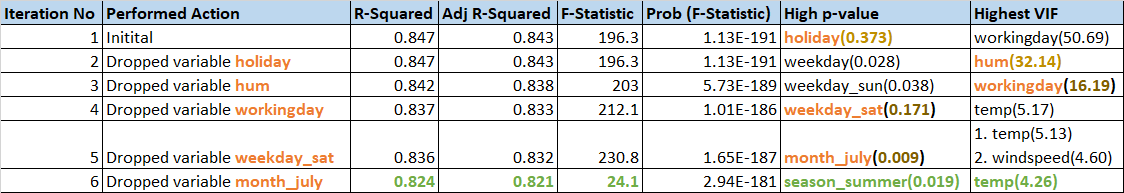!(4.26)


#### __Model Selection: Moving Forward with Model 6__

- **Reason for Selection**: 
  - All predictors in **Model 6** have very low p-values, indicating their statistical significance.
  - The VIF values for all predictors are below the permissible threshold of **5**, showing minimal multicollinearity.
  - **p-value** for F-statistic: Ensures the overall model is statistically significant.

- **Overall Model Fit**: 
  - The **Prob (F-statistic)** is exceptionally low, confirming that the overall model fit is highly significant.

- **Next Steps**: 
  - Proceeding with **Model 6** for further analysis and refinement.


In [1220]:
# Checking the parameters and their coefficient values
lr6.params 

const                        0.153545
yr                           0.232825
temp                         0.504355
season_spring               -0.077598
season_summer                0.036786
season_winter                0.084190
mnth_july                   -0.048841
mnth_sep                     0.076435
weekday_sun                 -0.045044
weathersit_Light_snowrain   -0.300370
weathersit_Misty            -0.079783
dtype: float64

#### __Final Model Interpretation__
##### __Hypothesis Testing:__
- Hypothesis testing states that:
    - H0:B1=B2=...=Bn=0
    - H1: at least one Bi!=0
##### __From the lr6 model summary, it is evident that all coefficients are not equal to zero which means we can REJECT the NULL HYPOTHESIS__

#### __Interpretation of Coefficients:__
- **const (0.153545)**: Even in the absence of all other predictor variables, bike rentals can still increase by 0.153545 units.
- **yr (0.232825)**: A unit increase in `yr` increases bike rentals by 0.232825 units.
- **temp (0.504355)**: A unit increase in `temp` increases bike rentals by 0.504355 units.
- **season_spring (-0.077598)**: A unit increase in `season_spring` decreases bike rentals by 0.077598 units.
- **season_summer (0.036786)**: A unit increase in `season_summer` increases bike rentals by 0.036786 units.
- **season_winter (0.084190)**: A unit increase in `season_winter` increases bike rentals by 0.084190 units.
- **mnth_july (-0.048841)**: A unit increase in `mnth_july` decreases bike rentals by 0.048841 units.
- **mnth_sep (0.076435)**: A unit increase in `mnth_sep` increases bike rentals by 0.076435 units.
- **weekday_sun (-0.045044)**: A unit increase in `weekday_sun` decreases bike rentals by 0.045044 units.
- **weathersit_Light_snowrain (-0.300370)**: A unit increase in `weathersit_Light_snowrain` decreases bike rentals by 0.300370 units.
- **weathersit_Misty (-0.079783)**: A unit increase in `weathersit_Misty` decreases bike rentals by 0.079783 units.


## __Step 6: Residual Analysis of the train data and validation__

In [1224]:
X_train_new

,yr,temp,season_spring,season_summer,season_winter,mnth_july,mnth_sep,weekday_sun,weathersit_Light_snowrain,weathersit_Misty
653,1,0.509887,0,0,1,0,0,0,0,0
576,1,0.815169,0,0,0,1,0,0,0,0
426,1,0.442393,1,0,0,0,0,0,0,1
728,1,0.245101,1,0,0,0,0,1,0,0
482,1,0.395666,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
526,1,0.824514,0,1,0,0,0,0,0,1
578,1,0.863973,0,0,0,0,0,0,0,0
53,0,0.202618,1,0,0,0,0,0,0,0
350,0,0.248216,0,0,1,0,0,0,0,1


In [1225]:
y_train_pred = lr6.predict(X_train_lm6)

#### __Normality of error terms__

Text(0.5, 0, 'Residual')

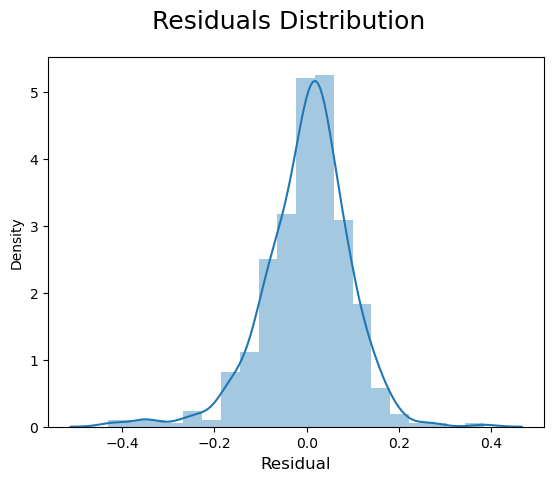

In [1227]:
# Plot the histogram of the error terms
res = y_train-y_train_pred
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Residuals Distribution', fontsize = 18)                  # Plot heading 
plt.xlabel('Residual', fontsize = 12)                         # X-label

###### __**Insights**: From the above histogram, we could see that the Residuals are normally distributed, which proves that assumption for Linear Regression is valid.__

### __Homoscedasticity__
##### __Assumption of homoscedasticity refers to the condition where the variance of the error terms is constant across all levels of the independent variable. When this assumption is violated, the error terms are said to be heteroscedastic, which can have several implications for the model's performance and inference.__
##### __Detecting heteroscedasticity is crucial, doing it through residual plot__

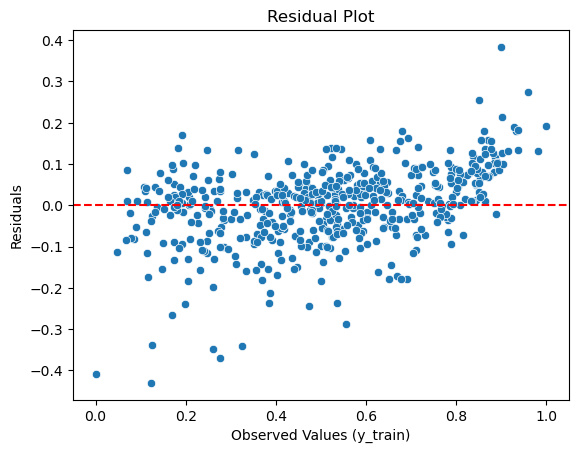

In [1230]:
y_train_pred = lr6.predict(X_train_lm6)  # Predict values
residual = y_train - y_train_pred       # Calculate residuals

# Scatter plot of residuals
sns.scatterplot(x=y_train, y=residual)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at 0
plt.xlabel('Observed Values (y_train)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

##### __No visible pattern observed from above plot for residuals.__


### __Verification of Multicollinearity between all predicted variables__

In [1233]:
X_train_lm6 = X_train_lm6.drop(["const"], axis = 1)
calculateVIF(X_train_lm6)

,Features,VIF
1,temp,4.26
0,yr,2.06
3,season_summer,1.93
4,season_winter,1.59
5,mnth_july,1.58
9,weathersit_Misty,1.54
2,season_spring,1.41
6,mnth_sep,1.33
7,weekday_sun,1.17
8,weathersit_Light_snowrain,1.07


#### Homoscedasticity validation

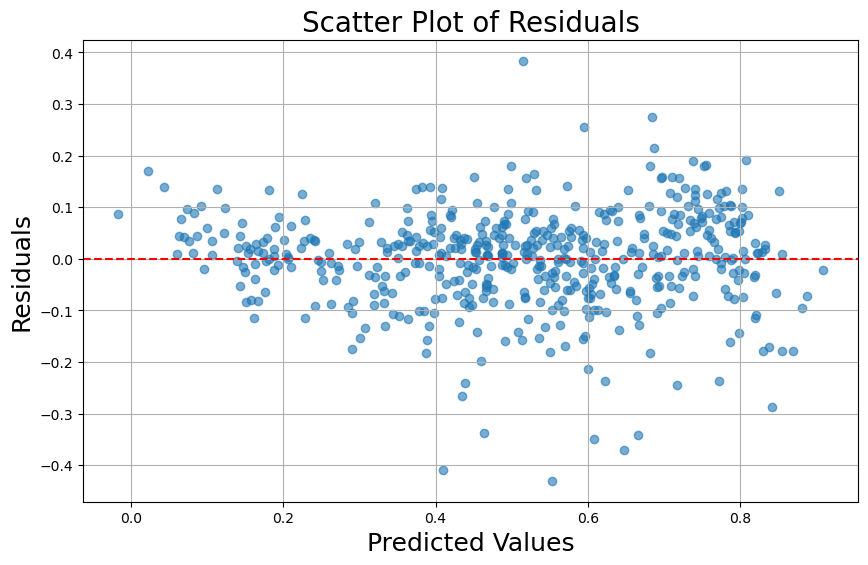

In [1235]:
# Calculate the error terms
errors = y_train - y_train_pred

# Create a scatter plot of predicted values vs. errors
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, errors, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.title('Scatter Plot of Residuals', fontsize=20)
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18)
plt.grid(True)
plt.show()

#### No specific pattern is observed in above plot

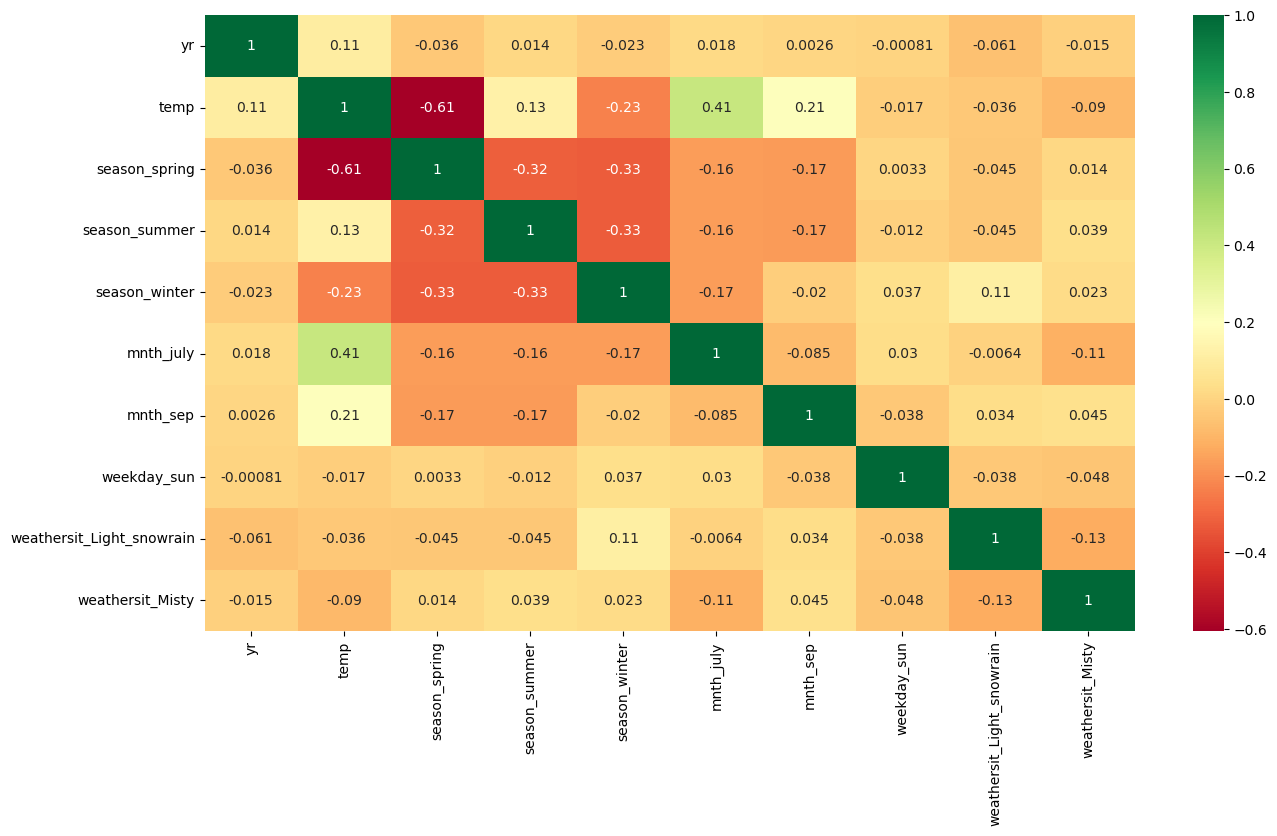

In [1237]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_lm6.corr(),annot = True, cmap="RdYlGn")
plt.show()

#### __Verification of Linearity__

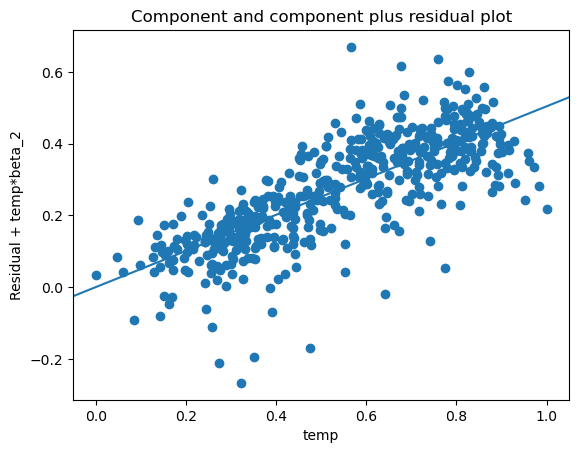

In [1239]:
sm.graphics.plot_ccpr(lr6, 'temp')
plt.show()

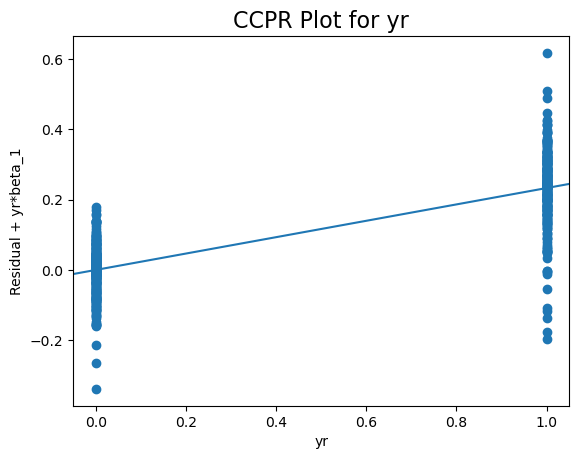

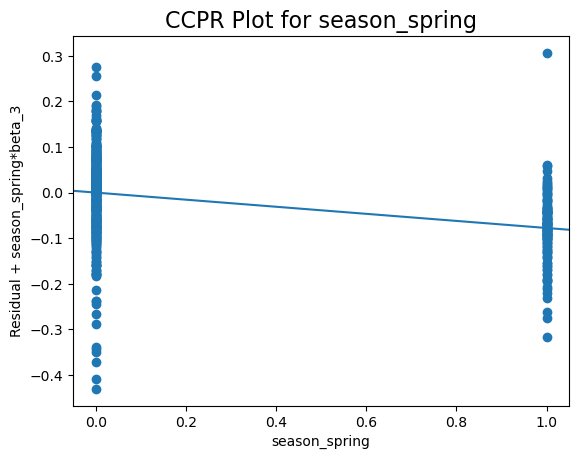

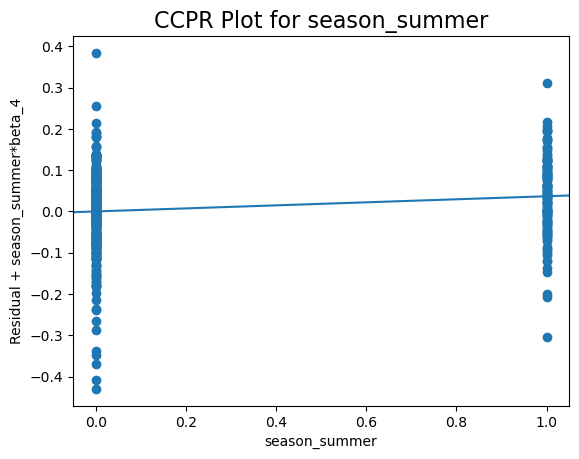

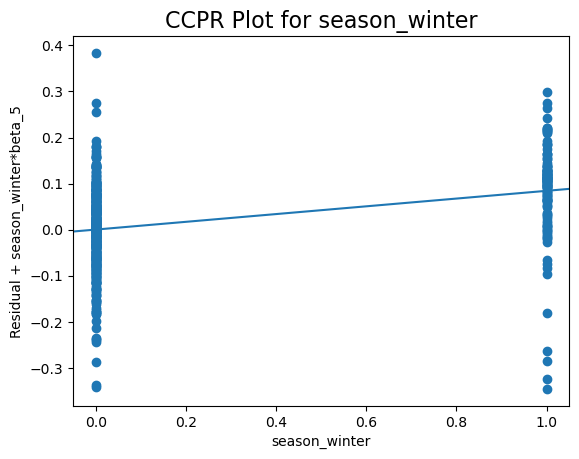

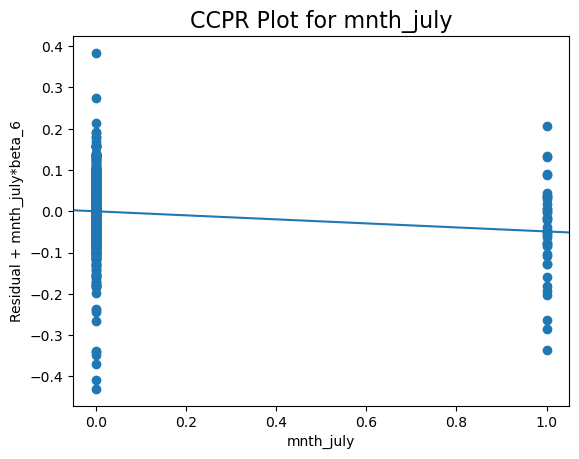

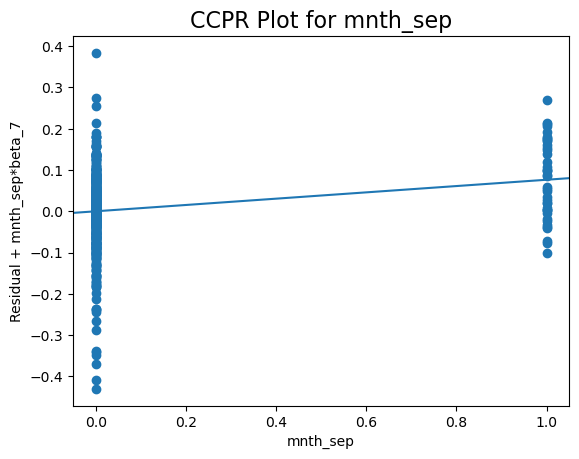

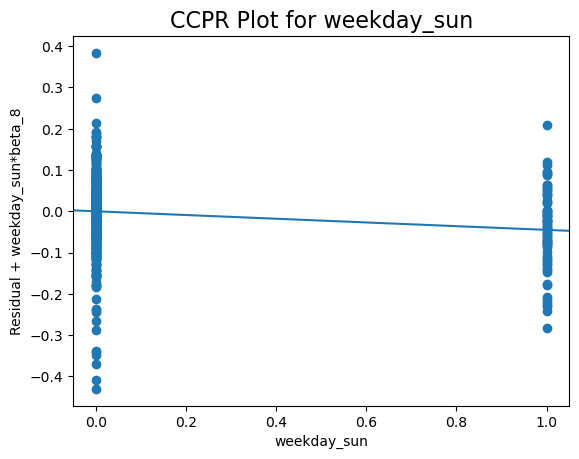

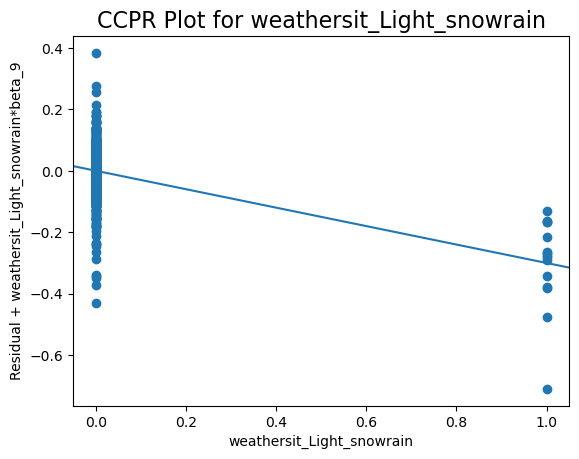

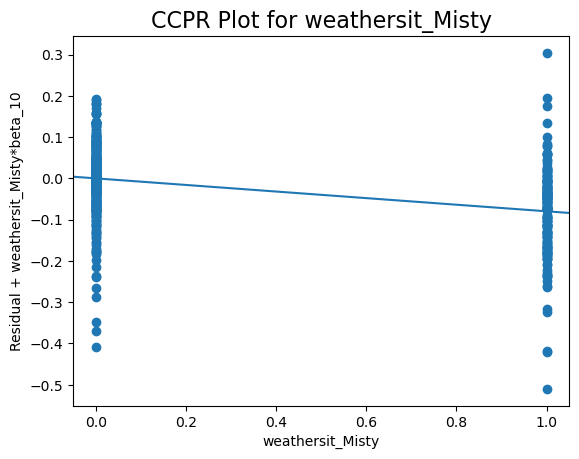

In [1240]:
# Linear relationship validation using CCPR (Component and component plus residual) plot


features = [
    'yr',
    'season_spring',
    'season_summer',
    'season_winter',
    'mnth_july',
    'mnth_sep',
    'weekday_sun',
    'weathersit_Light_snowrain',
    'weathersit_Misty'
]


for feature in features:
    sm.graphics.plot_ccpr(lr6, feature)
    plt.title(f'CCPR Plot for {feature}', fontsize=16)
    plt.show()

## __Step 7: Predictions Using the choosen Final Model__


#### __Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)__

#### __Applying the scaling on the test sets__

#### Apply scaler() to all numeric variables in test dataset. 
#### Note: we will only use scaler.transform, as we want to use the metrics that the model learned from the training data to be applied on the test data. In other words, we want to prevent the information leak from train to test dataset

In [1244]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [1245]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1246]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         219 non-null    int64  
 1   holiday                    219 non-null    int64  
 2   workingday                 219 non-null    int64  
 3   temp                       219 non-null    float64
 4   atemp                      219 non-null    float64
 5   hum                        219 non-null    float64
 6   windspeed                  219 non-null    float64
 7   season_spring              219 non-null    uint8  
 8   season_summer              219 non-null    uint8  
 9   season_winter              219 non-null    uint8  
 10  mnth_aug                   219 non-null    uint8  
 11  mnth_dec                   219 non-null    uint8  
 12  mnth_feb                   219 non-null    uint8  
 13  mnth_jan                   219 non-null    uint8  
 14

In [1247]:
#Selecting the variables that were part of final model.
col1=X_train_lm6.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_train_lm6 = sm.add_constant(X_test)
X_train_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   const                      219 non-null    float64
 1   yr                         219 non-null    int64  
 2   temp                       219 non-null    float64
 3   season_spring              219 non-null    uint8  
 4   season_summer              219 non-null    uint8  
 5   season_winter              219 non-null    uint8  
 6   mnth_july                  219 non-null    uint8  
 7   mnth_sep                   219 non-null    uint8  
 8   weekday_sun                219 non-null    uint8  
 9   weathersit_Light_snowrain  219 non-null    uint8  
 10  weathersit_Misty           219 non-null    uint8  
dtypes: float64(2), int64(1), uint8(8)
memory usage: 8.6 KB


In [1248]:
# Making predictions using the final model (lr6)
y_pred = lr6.predict(X_train_lm6)

## __Step 8: Model Evaluation__

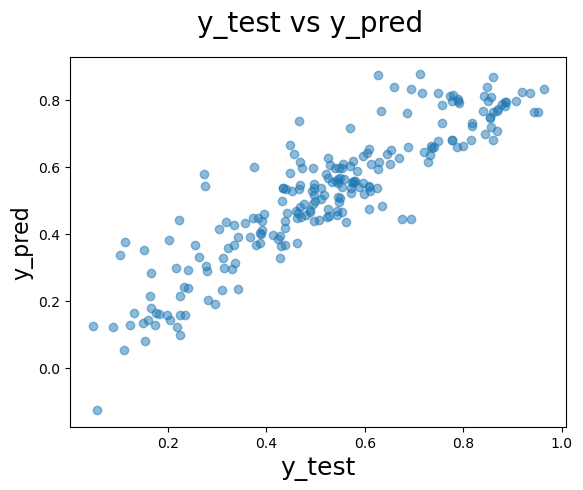

In [1250]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

### __R^2 Value for TEST__

In [1252]:
r2 = r2_score(y_test, y_pred)
round(r2,3)

0.81

##### __As R^2 = 0.81,This indicates that 81% of the variance in the test data is explained by the model's predictions.__

### __Adjusted R^2 Value for TEST__

In [1255]:
# We already have the value of R^2 (calculated in above step)
r2=0.81
# Get the shape of X_test
X_test.shape

(219, 10)

In [1256]:
# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
round(r2,1)

0.8

In [1257]:
round(lr6.params,4)

const                        0.1535
yr                           0.2328
temp                         0.5044
season_spring               -0.0776
season_summer                0.0368
season_winter                0.0842
mnth_july                   -0.0488
mnth_sep                     0.0764
weekday_sun                 -0.0450
weathersit_Light_snowrain   -0.3004
weathersit_Misty            -0.0798
dtype: float64

##### __The equation of best fitted surface based on model lr6:__
cnt = 0.1737 + (yr × 0.2344) - (holiday × 0.0562) + (workingday × 0.0465) + (temp × 0.4728) − (windspeed × 0.1563) - (cnt = 0.1356 + (yr × 0.2336) - (holiday × 0.0350) + (workingday × 0.0684) + (temp × 0.4920) − (windspeed × 0.1491) - (season_spring × 0.0653) + (season_summer × 0.0465) + (season_winter × 0.0859) - (mnth_july × 0.0500) + (mnth_sep × 0.0758) + (weekday_sat × 0.0801) + (weekday_sun × 0.0221) − (weathersit_Light_snowrain × 0.2904) − (weathersit_Misty × 0.0835)

#### __Visualizing the fit on the test data__
#### plotting a Regression plot

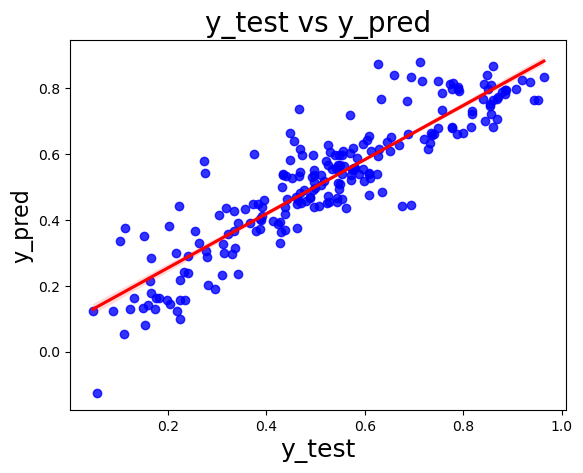

In [1260]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

##### __Comparison between Training and Testing dataset:__
- Train dataset R^2          : 0.824
- Test dataset R^2           : 0.81
- Train dataset Adjusted R^2 : 0.821   
- Test dataset Adjusted R^2  : 0.8

### __Conclusion:__

The key features used in predicting the target variable **cnt** (bike bookings) are:

- **yr**
- **temp**
- **mnth_jul**
- **mnth_Sep**
- **weekday_sun**
- **weathersit_Misty**
- **weathersit_Light_snowrain**
- **season_spring**
- **season_summer**
- **season_winter**

#### __Key Insights from the Model:__

1. **Temperature (temp):**
   - A **one-unit increase** in **temp** results in a **0.5044 increase** in bike bookings. 
   - This highlights that **warmer weather** plays a significant role in **driving bike demand**. The demand for bike rentals is much higher when the temperature rises, indicating a strong relationship between temperature and bike usage.

2. **Year (yr):**
   - A **unit increase** in the **yr** variable leads to a **0.2328 increase** in bike bookings.
   - This demonstrates a **rising trend** in demand for bikes over time, signaling consistent **business growth**. It reflects an expanding market or increasing popularity of bike-sharing services year on year.

3. **Snow/Rain/Thunderstorm (snow/rain/thunderstorm):**
   - A **unit increase** in **snow/rain/thunderstorm** leads to a **decrease of 0.3004** in bike bookings.
   - **Adverse weather conditions** significantly **negatively impact** bike demand, confirming that **bad weather** is a deterrent for outdoor activities such as biking.

#### __Overall Analysis:__

This analysis reveals that bike demand is primarily influenced by:
- **Positive factors** such as **warmer temperatures** and a **growing trend over the years**, which drive the **demand for shared bikes**.
- **Negative factors**, especially **adverse weather conditions** like **snow/rain/thunderstorms**, which **decrease bookings**.

Additionally, other factors such as **Sun, Jul, Sep**, and **seasonal variations** (misty/cloudy, spring, summer, winter) also play a role in influencing **bike rental demand**, but with comparatively smaller effects.
